In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [6]:
path = "C:\\age_gender\\UTKFace"
images = []
gender = []


In [7]:
for img in os.listdir(path):

  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))

  gender.append(np.array(genders))


images = np.array(images)   #Forgot to scale image for my training. Please divide by 255 to scale.
gender = np.array(gender,np.uint64)


In [8]:
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [9]:
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

history = history_gender

Epoch 1/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 584s 995ms/step - accuracy: 0.6842 - loss: 1.5470 - val_accuracy: 0.8252 - val_loss: 0.3901
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.8174 - loss: 0.3996 - val_accuracy: 0.8367 - val_loss: 0.4056
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 641s 1s/step - accuracy: 0.8465 - loss: 0.3507 - val_accuracy: 0.8600 - val_loss: 0.3224
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.8538 - loss: 0.3269 - val_accuracy: 0.8419 - val_loss: 0.3579
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 547s 984ms/step - accuracy: 0.8619 - loss: 0.3059 - val_accuracy: 0.8606 - val_loss: 0.3214
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 1395s 3s/step - accuracy: 0.8735 - loss: 0.2930 - val_accuracy: 0.8701 - val_loss: 0.2928
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 510s 918ms/step - accuracy: 0.8712 - loss: 0.2857 - val_accuracy: 0.8716 - val_loss: 0.2946
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 565s 1s/step - accuracy: 0.8821 - loss: 0.2692 

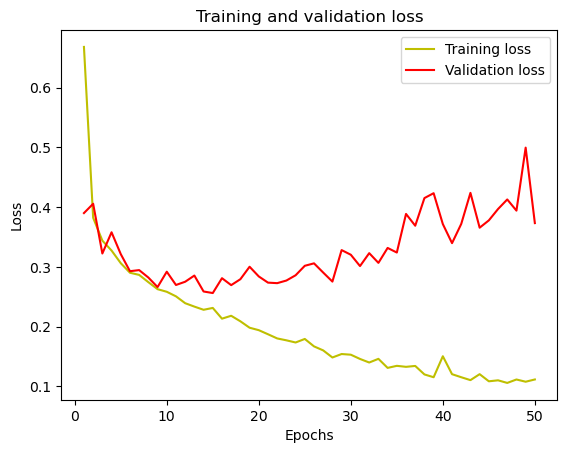

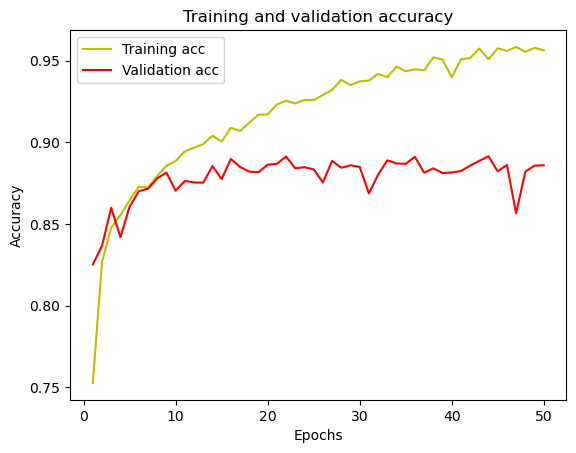

In [13]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

186/186 ━━━━━━━━━━━━━━━━━━━━ 36s 192ms/step
Accuracy =  0.8859456723468871


<Axes: >

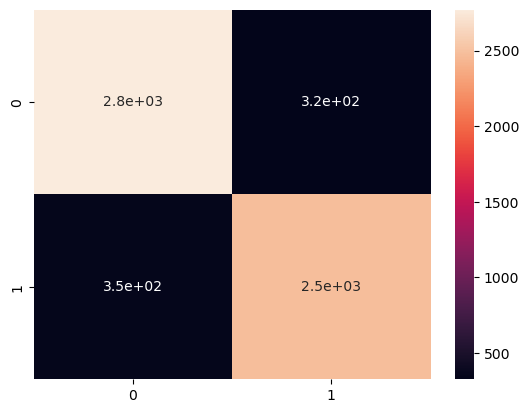

In [15]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)
sns.heatmap(cm, annot=True)
